<span style = "font-family: Arial; font-weight:bold;font-size:2.5em;color:blue;">Used Car Price Prediction

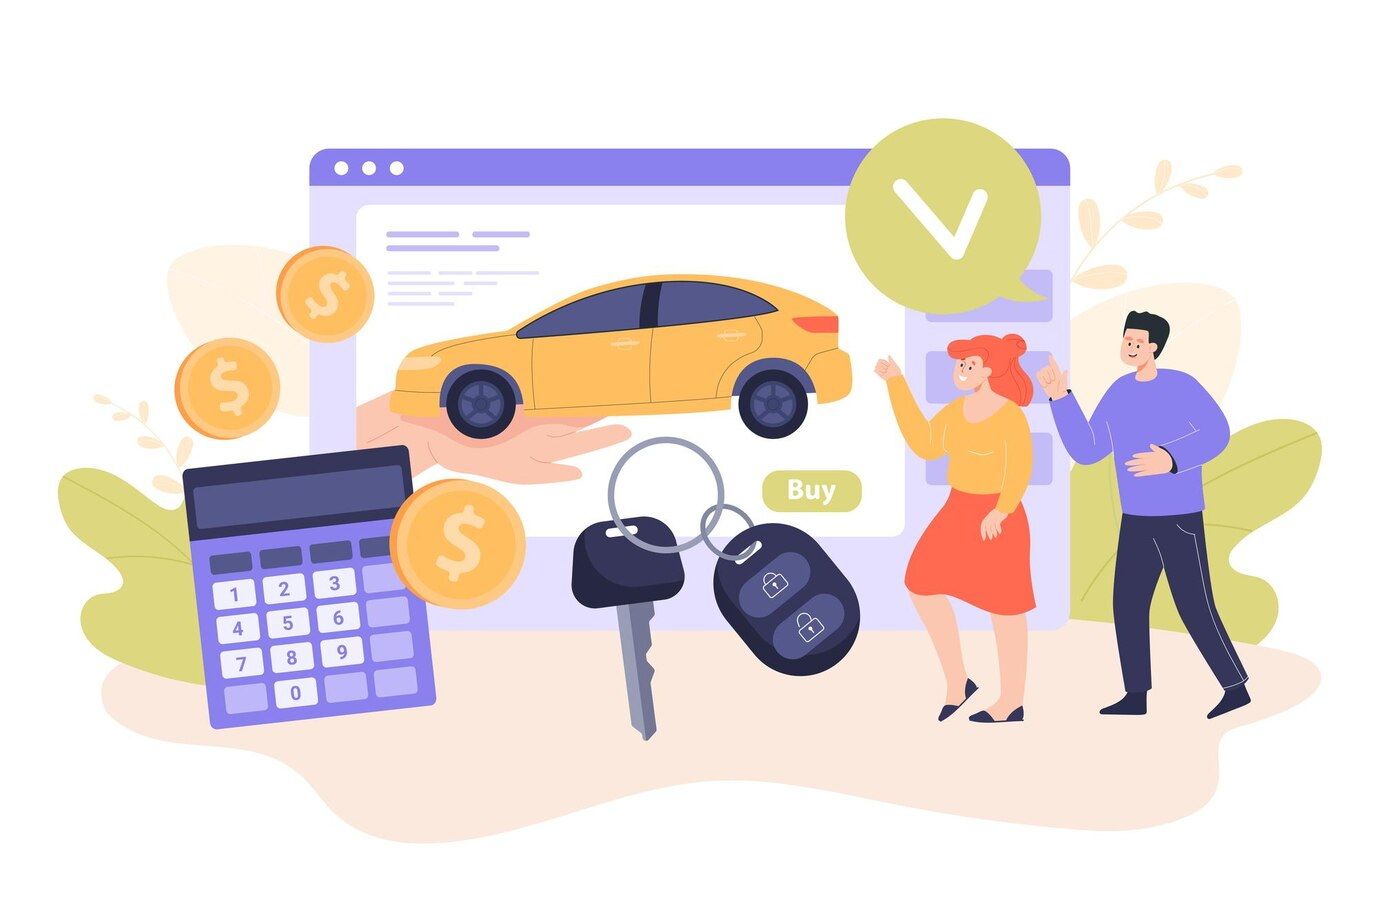

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Introduction

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.  

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.   

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Objectives

1. Explore and visualize the dataset. 
2. Build a linear regression model to predict the prices of used cars. 
3. Generate a set of insights and recommendations that will help the business. 


<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;">Methodology

Perform an Exploratory Data Analysis on the data
- Univariate analysis 

Data pre-processing
- Prepare the data for analysis 
- Missing value Treatment, Outlier Treatment, Feature Engineering

Model building - Linear Regression
- Build the model and comment on the model statistics 
- Identify the key variables that have a strong relationship with dependent variable  

Model performance evaluation
- Evaluate the model on different performance metrics - RMSE, MAE, Adjusted R-square 
- Comment on the performance measures and if there is any need to improve the model or not  

Test assumptions of linear regression model
- Perform tests for the assumptions of the linear regression 
- Comment on the findings from the test  



---

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as spy
import copy
import math
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import linear_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion 

In [3]:
data = pd.read_csv("used_cars_data.csv")

---

## Preview the dataset

In [4]:
# Preview the dataset
# View the first 5, last 5 and random 10 rows
print('First five rows', '--'*55)
display(data.head())

print('Last five rows', '--'*55)
display(data.tail())

print('Random ten rows', '--'*55)
np.random.seed(1)
display(data.sample(n=10))

First five rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Last five rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


Random ten rows --------------------------------------------------------------------------------------------------------------


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


**Observations:**
* The **S.No.** is simply a row identifier which can be removed later.
* The **Name** is long string comprising the Brand, Model and addition specification. These can be split to further analyse by make and model.
* The **Location** is a geographical location. We can possibly create a heat map of car make by location.
* The **Fuel_Type**, **Transmission** and **Owner_Type** are categorical variable which can be possibly be onehot encoded.
* **Mileage** is a string leading with number and unit. This shall be split into the mileage number and mileage unit. Further analysis will determine if the mileage number to be converted based on the units.
* **Engine** and **Power** both are strings leading with number and unit. This shall be split and numerical portion will be used in analysis.
* **Seats** is a discrete numerical variable.
* **New_Price** has many missing values. Where it contains a value the currency term shall be removed by splitting.
* **Price** has missing values

For ease of programming analysis the dataframe column names shall be converted to lower case.

In [5]:
data.columns = [col.lower() for col in data.columns]

Let's check the first row in the dataframe to verify the change

In [6]:
data.head(1)

,s.no.,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75


Columns names are in lower case

---

## Variable List

In [7]:
# Display list of variables in dataset
variable_list = data.columns.tolist()
print(variable_list)

['s.no.', 'name', 'location', 'year', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats', 'new_price', 'price']


---

## Get the shape of the dataset

In [8]:
shape = data.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"The Dataframe consists of '{n_rows}' rows and '{n_cols}' columns")

The Dataframe consists of '7253' rows and '14' columns


---

## Data info

In [9]:
# Get info of the dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   s.no.              7253 non-null   int64  
 1   name               7253 non-null   object 
 2   location           7253 non-null   object 
 3   year               7253 non-null   int64  
 4   kilometers_driven  7253 non-null   int64  
 5   fuel_type          7253 non-null   object 
 6   transmission       7253 non-null   object 
 7   owner_type         7253 non-null   object 
 8   mileage            7251 non-null   object 
 9   engine             7207 non-null   object 
 10  power              7207 non-null   object 
 11  seats              7200 non-null   float64
 12  new_price          1006 non-null   object 
 13  price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observations:**
* There seems to be some missing values across 6 columns.

---

**Panda Object Variable states**

In [10]:
# Panda Object Variable states function

def pandas_object_states(data):
    """
    This function checks if the variable type is pandas Object and
    displays the states and counts of each
    """
    # Loop through all variables
    for var in data.columns:
        # Check for pandas Object type
        if data[var].dtypes == "object":
            print('Unique values in', var, 'are :')
            print(data[var].value_counts().sort_index())
            print('--'*55)

In [11]:
# Check the states of all pandas Object variables
pandas_object_states(data)

Unique values in name are :
name
Ambassador Classic Nova Diesel    1
Audi A3 35 TDI Attraction         2
Audi A3 35 TDI Premium            1
Audi A3 35 TDI Premium Plus       2
Audi A3 35 TDI Technology         1
                                 ..
Volvo XC60 D4 Summum              1
Volvo XC60 D5                     3
Volvo XC60 D5 Inscription         1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo XC90 2007-2015 D5 AWD       3
Name: count, Length: 2041, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in location are :
location
Ahmedabad     275
Bangalore     440
Chennai       591
Coimbatore    772
Delhi         660
Hyderabad     876
Jaipur        499
Kochi         772
Kolkata       654
Mumbai        949
Pune          765
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in fuel_type are :
fuel_type
C

---

**Missing value summary function**

In [12]:
def missing_val_chk(data):
    """
    This function to checks for missing values 
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

In [13]:
#Applying the missing value summary function
missing_val_chk(data)

The missing values summary


,# missing,percent
new_price,6247,86.130
price,1234,17.014
seats,53,0.731
engine,46,0.634
power,46,0.634
mileage,2,0.028


**There a lot of missing values that need to be dealt with.**

---

## 5 Point Summary

**Numerical type Summary**

In [14]:
# Five point summary of all numerical type variables in the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
s.no.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
kilometers_driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


**Categorical type Summary**

In [15]:
data.describe(include=['object']).T

,count,unique,top,freq
name,7253,2041,Mahindra XUV500 W8 2WD,55
location,7253,11,Mumbai,949
fuel_type,7253,5,Diesel,3852
transmission,7253,2,Manual,5204
owner_type,7253,4,First,5952
mileage,7251,450,17.0 kmpl,207
engine,7207,150,1197 CC,732
power,7207,386,74 bhp,280
new_price,1006,625,63.71 Lakh,6


**Observation:**
* The `Mileage`, `Engine`, `Power` and `New_Price` are strings with numerical values. We need to extract the numerical values for further analysis.
* **Seats** - There minimum no of seats definitely cant be 0. This may be an error would be address later on.
* **There is a significant amount of data pre-processing required before we can explore the dataset.**

---

---